In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [26]:
dir0='C:\\Users\\Anirudh\\Downloads\\DATASET\\C-NMC_training_data\\fold_0'
dir1='C:\\Users\\Anirudh\\Downloads\\DATASET\\C-NMC_training_data\\fold_1'
dir2='C:\\Users\\Anirudh\\Downloads\\DATASET\\C-NMC_training_data\\fold_2'
dir3='C:\\Users\\Anirudh\\Downloads\DATASET\\C-NMC_test_prelim_phase_data\\C-NMC_test_prelim_phase_data'

CATEGORIES=['hem','all']

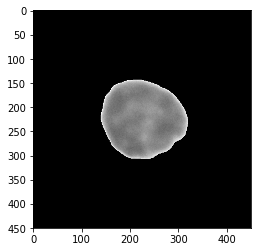

In [27]:
for category in CATEGORIES:  
    path = os.path.join(dir0,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break 
    break  

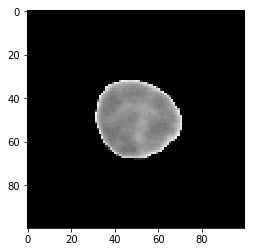

In [28]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [29]:
def get(dir,training_data):
    for cat in CATEGORIES:
        path=os.path.join(dir,cat)
        class_num=CATEGORIES.index(cat)
        for img in os.listdir(path):
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array,class_num])
            
def divide(training_data):
    for features,label in training_data:
        X.append(features)
        y.append(label)
import random
def shuffle(training_data):
    random.shuffle(training_data)

In [30]:
train0=[]
get(dir0,train0)
shuffle(train0)


In [31]:
train1=[]
get(dir1,train1)
shuffle(train1)


In [32]:
train2=[]
get(dir2,train2)
shuffle(train2)


In [33]:
print("The size of The 3 datasets are ")
print(len(train0))
print(len(train1))
print(len(train2))


The size of The 3 datasets are 
3527
3581
3553


In [34]:
X=[]
y=[]


divide(train0)
divide(train1)
divide(train2)

In [35]:
X=np.asarray(X)
y=np.asarray(y)

In [36]:
np.shape(X)

(10661, 100, 100)

In [37]:
X=X.reshape(10661, IMG_SIZE, IMG_SIZE,1)


import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [38]:
import tensorflow as tf

model = tf.keras.models.Sequential() 

model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu', input_shape=X.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax')) 

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [40]:
model.fit(X,y,epochs=5)

Epoch 1/5
10661/10661 [==============================] - 54s 5ms/step - loss: 5.1155 - acc: 0.6814
Epoch 2/5
10661/10661 [==============================] - 53s 5ms/step - loss: 5.1237 - acc: 0.6821
Epoch 3/5
10661/10661 [==============================] - 54s 5ms/step - loss: 5.1237 - acc: 0.6821
Epoch 4/5
10661/10661 [==============================] - 54s 5ms/step - loss: 5.1237 - acc: 0.6821
Epoch 5/5
10661/10661 [==============================] - 54s 5ms/step - loss: 5.1237 - acc: 0.6821


In [41]:
y_test=pd.read_csv("C:\\Users\\Anirudh\\Downloads\\DATASET\\C-NMC_test_prelim_phase_data\\C-NMC_test_prelim_phase_data_labels.csv")

In [42]:
y_test=y_test['labels']

In [43]:
x_test=[]
for img in os.listdir(dir3):
            img_arr=cv2.imread(os.path.join(dir3,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            x_test.append(new_array)

In [44]:
x_test=np.asarray(x_test)

In [45]:
np.shape(x_test)

(1867, 100, 100)

In [46]:
x_test=x_test.reshape(1867, IMG_SIZE, IMG_SIZE,1)


In [47]:
model.evaluate(x_test,y_test)

1867/1867 [==============================] - 5s 2ms/step


[5.5942827291391595, 0.6529191215535058]